<a href="https://colab.research.google.com/github/balajimanilal/YouTube-Sentiment-Insights-A-Data-Analysts-Perspective/blob/main/YouTube_Sentiment_Insights_A_Data_Analyst's_Perspective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read & Load CSV Data

**Importing necessary Packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
try:
    comments = pd.read_csv('/content/drive/MyDrive/Data Analyst Project/UScomments.csv', on_bad_lines='skip')
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

<ipython-input-20-36ee4d91d75d>:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('/content/drive/MyDrive/Data Analyst Project/UScomments.csv', on_bad_lines='skip')


In [ ]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [ ]:
#Finding Missing Values
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [ ]:
#Dropping Missing Values
comments.dropna(inplace=True)

In [ ]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# Performing Sentiment Analysis

**To perform sentiment analysis using TextBlob which is a NLP library built on top of NLTK**

In [ ]:
pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
comments.head(8)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0


In [ ]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

0.0

In [ ]:
comments.shape

(691374, 4)

In [ ]:
polarity = []

for comment in comments['comment_text']:
  try:
    polarity.append(TextBlob(comment).sentiment.polarity)
  except:
    polarity.append(0)

In [ ]:
len(polarity)

691374

In [ ]:
# Inserting polarity values into comments dataframe while defining feature name as "polarity"
comments['polarity'] = polarity

In [ ]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


# Wordcloud Analysis

Performing EDA for the highly Positve sentences ie Polarity value will be 1

In [ ]:
comments['polarity']==1

0         False
1         False
2         False
3         False
4         False
          ...  
691395    False
691396    False
691397    False
691398    False
691399    False
Name: polarity, Length: 691374, dtype: bool

In [ ]:
filter1 = comments['polarity']==1

In [ ]:
comments[filter1]

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
...,...,...,...,...,...
691373,EoejGgUNmVU,Perfect. Every version,0,0,1.0
691383,EoejGgUNmVU,Me encantaaaaa <3,0,0,1.0
691388,EoejGgUNmVU,Best song ever 🤘,0,0,1.0
691389,EoejGgUNmVU,excellent performance,0,0,1.0


In [ ]:
comments_positive = comments[filter1]

In [ ]:
filter2=comments['polarity']==-1

In [ ]:
comments[filter2]

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
...,...,...,...,...,...
690788,Hlt3rA-oDao,Like Kelly she evil,0,0,-1.0
690865,Ni5Uc-DdMqk,R U FUCKING KIDDING ME?!?!?!?!,11,1,-1.0
691073,4kmSATD25iY,This is horribly offensive please report,0,0,-1.0
691180,xlu6i6lT_vk,Sink holes looks terrifying sinkholes sink you...,0,0,-1.0


In [ ]:
comments_negative = comments[filter2]

In [ ]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [ ]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [ ]:
type(comments['comment_text'])

pandas.core.series.Series

For wordcloud , I need to frame my 'comment_text' feature into string ..


In [ ]:
total_comments_positive = " ".join(comments_positive['comment_text'])

In [ ]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

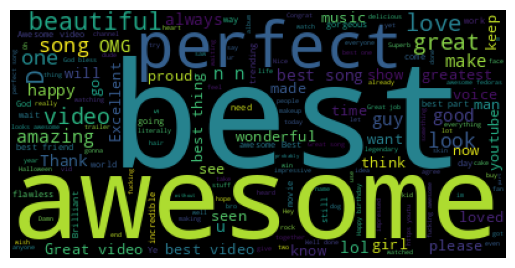

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
# Conclusion - Positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..

In [ ]:
total_comments_negative = " ".join(comments_negative['comment_text'])

In [ ]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

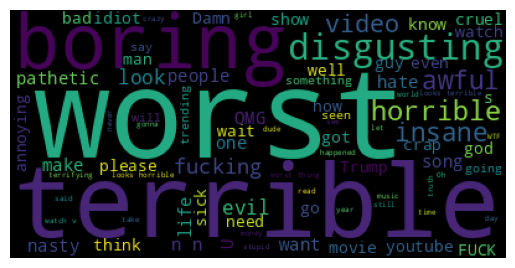

In [ ]:
plt.imshow(wordcloud2)
plt.axis('off')

In [ ]:
# Conclusion - Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

# Emoji Analysis

In [ ]:
# 2.2.0 is a most stable version till date , hence installing this version makes sense !

In [ ]:
pip install emoji==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234912 sha256=b6aa731472a8f37707198eda1ac6b5171170fc916cdc3961ba48ddf676e97814
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [ ]:
import emoji

In [ ]:
emoji.__version__

'2.2.0'

In [ ]:
comments['comment_text'].head()

0                    Logan Paul it's yo big day ‼️‼️‼️
1    I've been following you from the start of your...
2                   Say hi to Kong and maverick for me
3                                  MY FAN . attendance
4                                           trending 😉
Name: comment_text, dtype: object

Extracting emoji from below comment

In [ ]:
comment = 'trending 😉'

In [ ]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉']

**Have tried to write the above code in a more simpler & readable way...**

In [ ]:
emoji_list = []

for char in comment:
  if char in emoji.EMOJI_DATA:
    emoji_list.append(char)

In [ ]:
emoji_list

['😉']

In [ ]:
all_emoji_list = []

for comment in comments['comment_text'].dropna():
  for char in comment:
    if char in emoji.EMOJI_DATA:
      all_emoji_list.append(char)

In [ ]:
all_emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

Here I have to compute frequencies of each & every emoji in "all_emojis_list"...

In [ ]:
from collections import Counter

In [ ]:
Counter(all_emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [ ]:
Counter(all_emoji_list).most_common(10)[0]

('😂', 36987)

In [ ]:
Counter(all_emoji_list).most_common(10)[0][0]

'😂'

In [ ]:
Counter(all_emoji_list).most_common(10)[0][1]

36987

In [ ]:
[Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [ ]:
emojis = [Counter(all_emoji_list).most_common(10)[i][0] for i in range(10)]

In [ ]:
freqs = [Counter(all_emoji_list).most_common(10)[i][1] for i in range(10)]

In [ ]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [ ]:
import plotly.graph_objects as go
from plotly.offline import iplot

In [ ]:
trace = go.Bar(x=emojis, y=freqs)

In [ ]:
iplot([trace])

In [ ]:
# Conclusions - Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

# Summary and Conclusions

This project presents a comprehensive analysis of sentiment and emoji usage within YouTube comments, providing valuable insights into viewer engagement and emotional responses. Leveraging Python libraries such as Pandas, NumPy, Matplotlib, Seaborn, TextBlob, and WordCloud, the project explores a dataset of YouTube comments to extract sentiment polarity and identify prevalent emojis.

**Data Handling and Preprocessing:**
The project begins with importing the necessary libraries and loading the CSV data containing YouTube comments. After loading the data, missing values are handled by dropping them from the dataset to ensure data integrity.

**Sentiment Analysis:**
Using the TextBlob library, sentiment analysis is performed on the comments, extracting the polarity of each comment to determine whether it is positive, negative, or neutral. The sentiment analysis provides valuable insights into viewer opinions and attitudes expressed in the comments.

**Visualization:**
Visualizations play a crucial role in understanding the sentiment and emoji usage within the comments. Word clouds are generated for both positive and negative comments, visually highlighting the most frequently used words associated with each sentiment. Additionally, a bar chart illustrates the frequency of the top emojis used by viewers in their comments, providing insights into the emotional expressions conveyed through emojis.

**Emoji Analysis:**
The project goes beyond textual analysis to explore emoji usage within YouTube comments. By analyzing the frequency of emojis, the project identifies the most commonly used emojis by viewers, shedding light on the emotional tone and reactions expressed in the comments.

> **Key Findings:**
* The sentiment analysis revealed that the majority of comments expressed positive sentiments, with viewers often using words like "best," "awesome," "perfect," and "amazing."
* Conversely, negative sentiments were less prevalent but often expressed using words like "terrible," "worst," "horrible," and "disgusting."
* Emoji analysis uncovered that viewers frequently used emojis such as 😂, ❤️, and 😍, indicating a high level of amusement, love, and admiration within the YouTube comments.

**Conclusion:**
Through sentiment analysis and emoji usage exploration, this project unveils valuable insights into viewer engagement and emotional responses within YouTube comments. The findings offer content creators, marketers, and analysts a deeper understanding of viewer sentiments, preferences, and engagement patterns, enabling them to make informed decisions to enhance content strategy, audience engagement, and overall viewer satisfaction on the YouTube platform. This project serves as a foundational exploration into sentiment analysis and emoji usage within online user-generated content, paving the way for further research and analysis in the field of social media analytics and user sentiment analysis.